In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# (EDA) with Multiple Datasets for Loan Utilization and Drawdown Rate Correlation

Exploratory Data Analysis (EDA) is an essential step in data preprocessing and feature understanding before constructing predictive models.

In the context of loan utilization and drawdown rate prediction, utilizing multiple datasets can yield valuable insights into the underlying relationships between features and outcomes. Here, we discuss how EDA conducted on three distinct datasets — a small one with 340 features, a medium-sized dataset with 534 features, and the original application dataset featuring 126 features — can help unveil correlated features for predicting loan utilization and drawdown rates.

By conducting EDA across these three datasets, we open avenues for identifying features that correlate with loan utilization and drawdown rates. The supplementary datasets contribute information about previous loans and their monthly balances, enriching the dataset with a broader context.

# Calling Datasets

In [3]:
#Small Datasets
#train_small = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_train_small.csv')
test_small = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_test_small.csv')

#Model Dataset
#train_medium = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_train_medium.csv')
#test_medium = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_test_medium.csv')

#Unadulterated Dataset predictor_test_small
#test_small = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_test_small.csv')

#application_train = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_train_application.csv')
#application_test = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_test_application.csv')

#NN TARGET Values
predicted_target = pd.read_csv('/content/drive/MyDrive/Thesis/Home Credit Section/Final [Small]/predictor_small_NN.csv')
test_small = pd.merge(test_small, predicted_target[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')
#train_medium=train_medium.drop(columns=['TARGET'])
#train_medium = pd.merge(train_medium, predicted_target[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')

# Inspecting Data

# Plotting

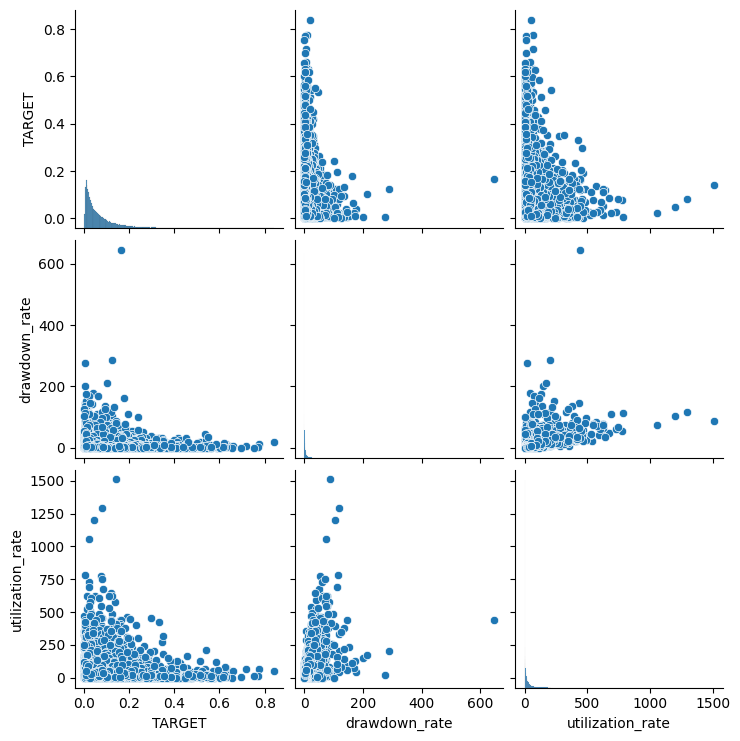

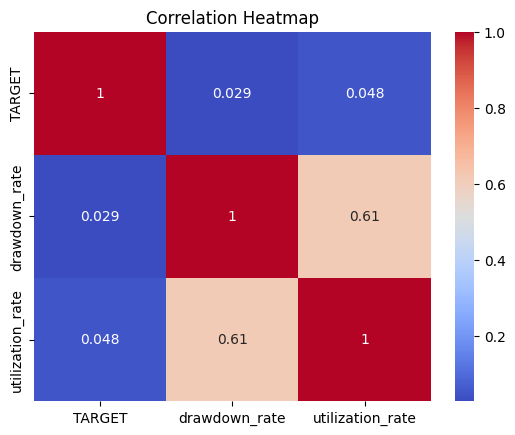

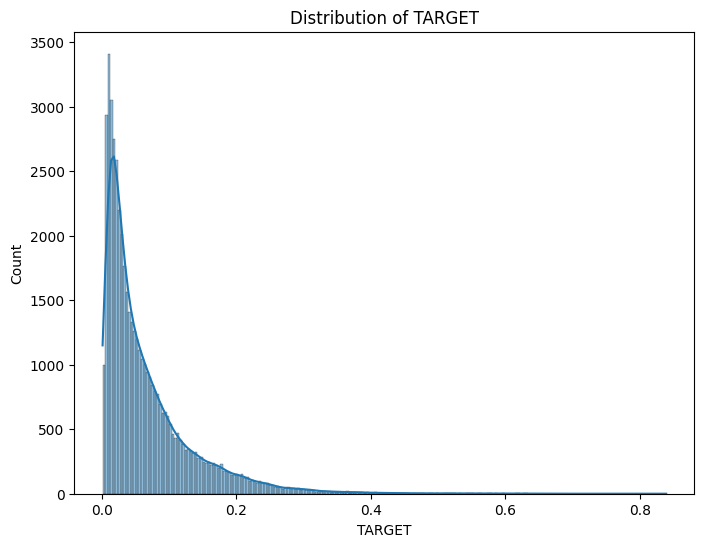

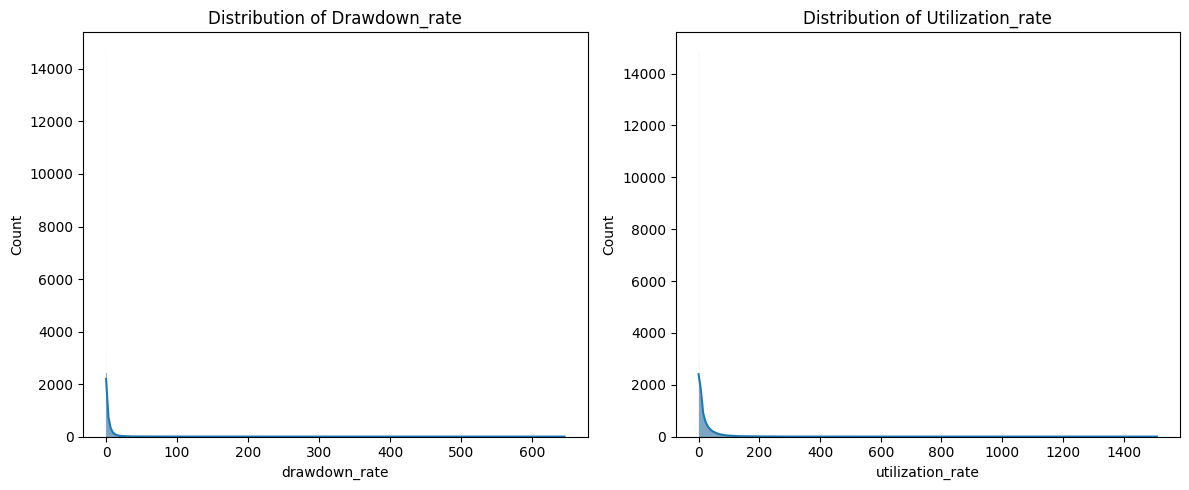

In [4]:
# Explore relationships between variables using pairplot

train_plot=test_small
train_plot['drawdown_rate']=train_plot['drawdown_rate']*100
train_plot['utilization_rate']=train_plot['utilization_rate']*100

sns.pairplot(train_plot[['TARGET', 'drawdown_rate', 'utilization_rate']])
plt.show()

# Plot correlation heatmap
correlation_matrix = train_plot[['TARGET', 'drawdown_rate', 'utilization_rate']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Explore distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data=train_plot, x='TARGET', kde=True)
plt.title('Distribution of TARGET')
plt.show()

# Explore distribution of Drawdown_rate and Utilization_rate
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=train_plot, x='drawdown_rate', kde=True)
plt.title('Distribution of Drawdown_rate')

plt.subplot(1, 2, 2)
sns.histplot(data=train_plot, x='utilization_rate', kde=True)
plt.title('Distribution of Utilization_rate')

plt.tight_layout()
plt.show()

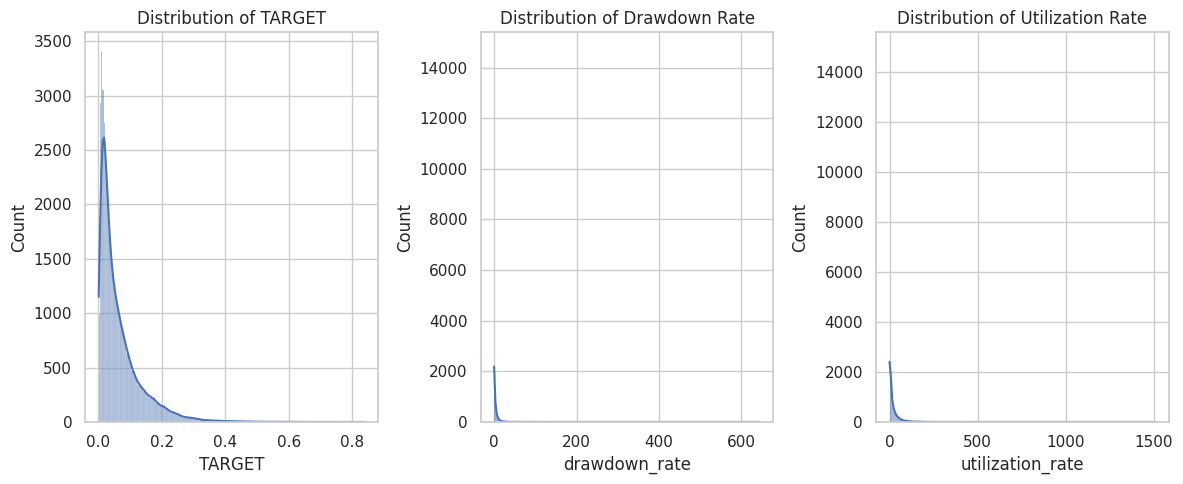

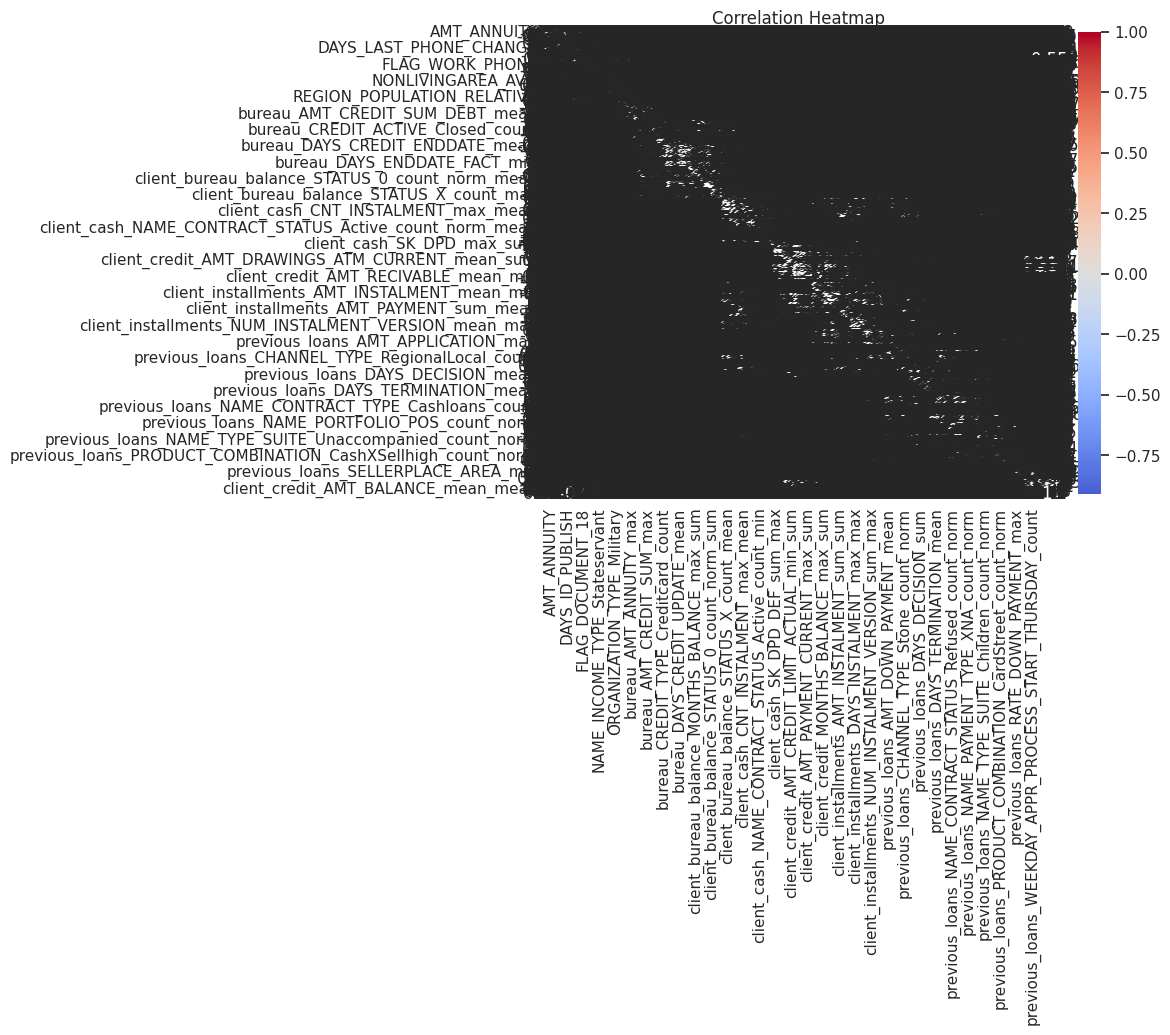

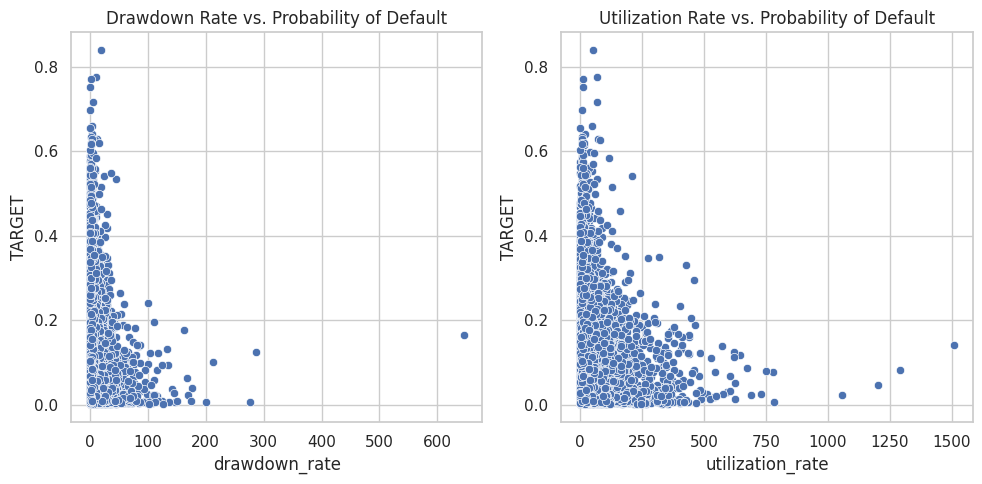

In [5]:

# Set up the plotting style (optional)
sns.set(style="whitegrid")

# Plot the distribution of values
plt.figure(figsize=(12, 5))

# Distribution of 'TARGET'
plt.subplot(131)
sns.histplot(data=train_plot, x='TARGET', kde=True)
plt.title('Distribution of TARGET')

# Distribution of 'drawdown_rate'
plt.subplot(132)
sns.histplot(data=train_plot, x='drawdown_rate', kde=True)
plt.title('Distribution of Drawdown Rate')

# Distribution of 'utilization_rate'
plt.subplot(133)
sns.histplot(data=train_plot, x='utilization_rate', kde=True)
plt.title('Distribution of Utilization Rate')

plt.tight_layout()
plt.show()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = train_plot.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

# Plot scatter plot of rates vs. probability of default
plt.figure(figsize=(10, 5))

plt.subplot(121)
sns.scatterplot(data=train_plot, x='drawdown_rate', y='TARGET')
plt.title('Drawdown Rate vs. Probability of Default')

plt.subplot(122)
sns.scatterplot(data=train_plot, x='utilization_rate', y='TARGET')
plt.title('Utilization Rate vs. Probability of Default')

plt.tight_layout()
plt.show()

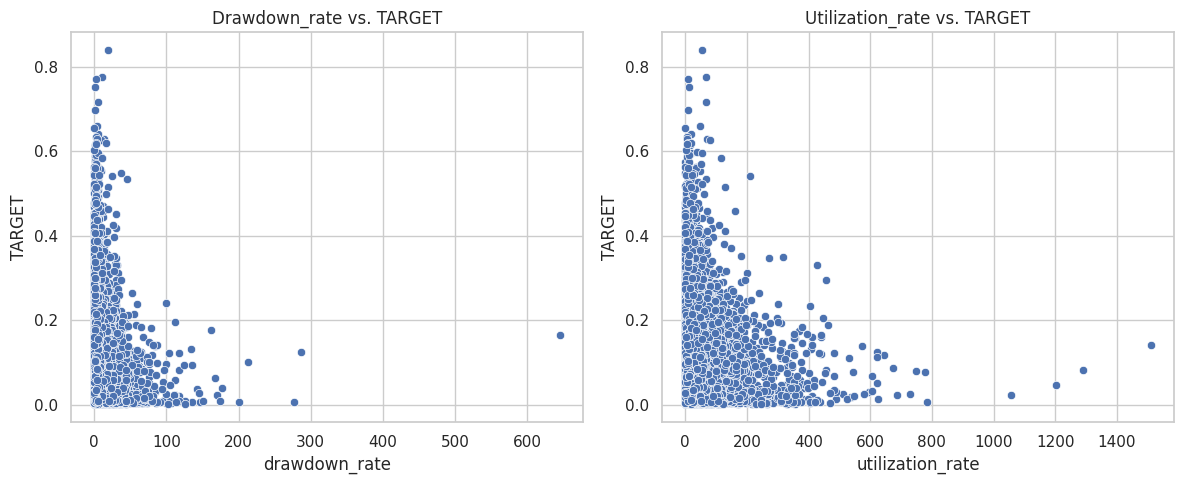

TARGET                                                    1.000000
bureau_DAYS_CREDIT_mean                                   0.287677
bureau_CREDIT_ACTIVE_Active_count                         0.273068
client_bureau_balance_STATUS_1_count_norm_max             0.242774
previous_loans_NAME_CONTRACT_STATUS_Refused_count_norm    0.237772
                                                            ...   
client_bureau_balance_STATUS_C_count_mean                -0.220988
EXT_SOURCE_1                                             -0.424675
EXT_SOURCE_2                                             -0.452915
EXT_SOURCE_3                                             -0.548143
FLAG_DOCUMENT_13                                               NaN
Name: TARGET, Length: 340, dtype: float64


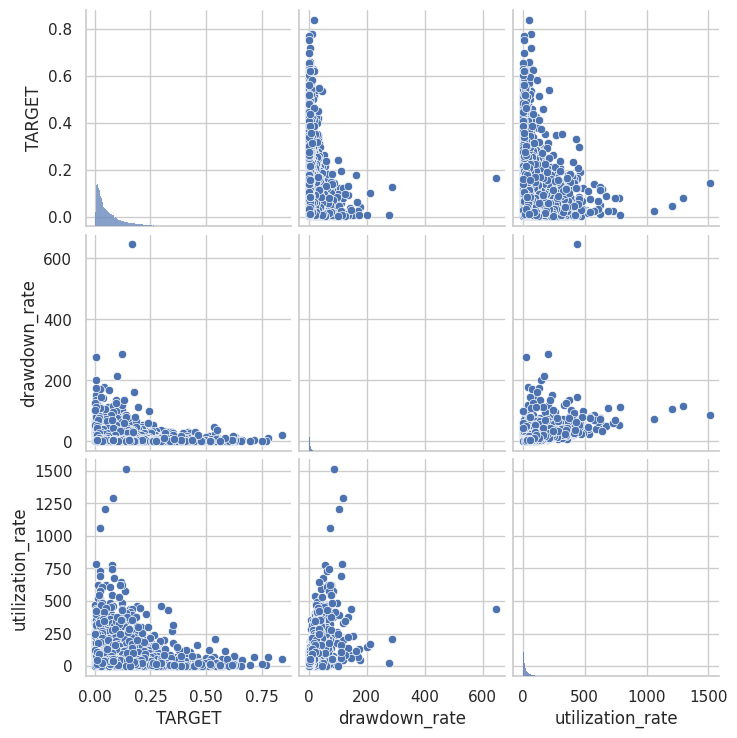

In [7]:
# Scatter plots to visualize correlations between features and the target
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=train_plot, x='drawdown_rate', y='TARGET')
plt.title('Drawdown_rate vs. TARGET')

plt.subplot(1, 2, 2)
sns.scatterplot(data=train_plot, x='utilization_rate', y='TARGET')
plt.title('Utilization_rate vs. TARGET')

plt.tight_layout()
plt.show()

# Identify highest correlations with the target
correlation_with_target = train_plot.corr()['TARGET'].sort_values(ascending=False)
print(correlation_with_target)

# Pairplot focusing on highest correlated features
high_corr_features = ['TARGET', 'drawdown_rate', 'utilization_rate']
sns.pairplot(train_plot[high_corr_features])
plt.show()

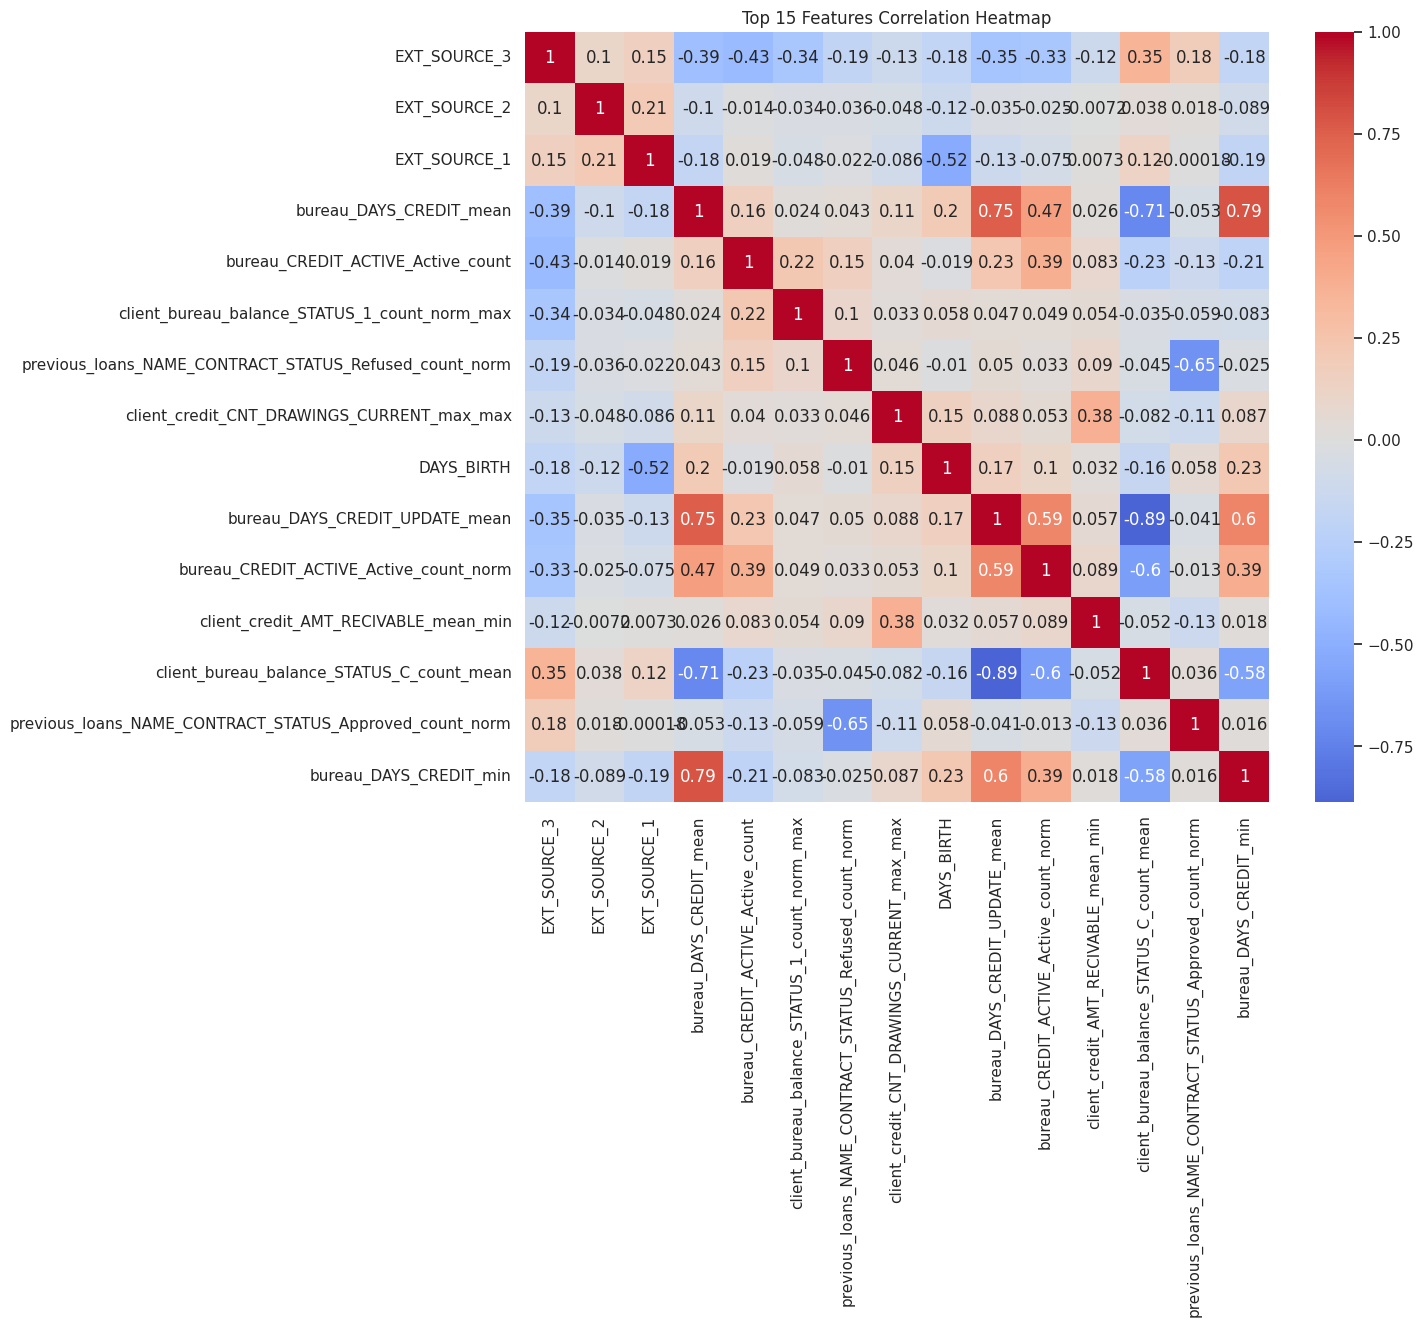

In [8]:
# Calculate correlation matrix
correlation_matrix = train_plot.corr()

# Calculate correlation of features with 'TARGET' and select top 15
top_features = correlation_matrix['TARGET'].abs().sort_values(ascending=False)[1:16].index
top_corr_matrix = train_plot[top_features].corr()

# Set up the plotting style
sns.set(style="white")

# Plot correlation heatmap for top features
plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Top 15 Features Correlation Heatmap')
plt.show()

# Finding most powerful correlations

In [9]:
# Find correlations with the target and sort
application_train_corr=train_plot
application_train_corr['drawdown_rate']=application_train_corr['drawdown_rate']*100
application_train_corr['utilization_rate']=application_train_corr['utilization_rate']*100
correlations = application_train_corr.corr()['drawdown_rate'].sort_values()
#application_train['drawdown_rate']
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 client_credit_AMT_CREDIT_LIMIT_ACTUAL_min_min      0.284714
client_credit_AMT_CREDIT_LIMIT_ACTUAL_mean_mean    0.297606
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_sum    0.298352
client_credit_AMT_BALANCE_mean_mean                0.385284
client_credit_AMT_DRAWINGS_POS_CURRENT_mean_sum    0.392792
client_credit_AMT_PAYMENT_TOTAL_CURRENT_max_max    0.406526
client_credit_AMT_INST_MIN_REGULARITY_max_min      0.438844
client_credit_CNT_DRAWINGS_CURRENT_max_max         0.442051
client_credit_AMT_RECIVABLE_mean_min               0.449745
client_credit_AMT_DRAWINGS_CURRENT_max_max         0.511823
utilization_rate                                   0.610599
client_credit_AMT_DRAWINGS_CURRENT_mean_mean       0.666601
client_credit_AMT_DRAWINGS_CURRENT_mean_max        0.703924
drawdown_rate                                      1.000000
FLAG_DOCUMENT_13                                        NaN
Name: drawdown_rate, dtype: float64

Most Negative Correlations:
 AMT_C

In [10]:
# Find correlations with the target and sort
correlations = train_plot.corr()['utilization_rate'].sort_values()
#application_train['drawdown_rate']
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 client_credit_AMT_CREDIT_LIMIT_ACTUAL_min_min      0.315022
client_credit_AMT_BALANCE_min_sum                  0.315226
client_credit_AMT_CREDIT_LIMIT_ACTUAL_mean_mean    0.330117
client_credit_CNT_DRAWINGS_ATM_CURRENT_sum_mean    0.330870
client_credit_AMT_DRAWINGS_ATM_CURRENT_mean_sum    0.336378
client_credit_AMT_DRAWINGS_CURRENT_mean_mean       0.340178
client_credit_AMT_BALANCE_min_max                  0.351548
client_credit_AMT_DRAWINGS_CURRENT_max_max         0.418803
client_credit_AMT_TOTAL_RECEIVABLE_sum_min         0.494925
client_credit_AMT_INST_MIN_REGULARITY_max_min      0.561161
drawdown_rate                                      0.610599
client_credit_AMT_BALANCE_mean_mean                0.678336
client_credit_AMT_RECIVABLE_mean_min               0.700601
utilization_rate                                   1.000000
FLAG_DOCUMENT_13                                        NaN
Name: utilization_rate, dtype: float64

Most Negative Correlations:
 AM

In [11]:
correlations = train_plot.corr()['TARGET'].sort_values()
#application_train['drawdown_rate']
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 client_bureau_balance_STATUS_1_count_norm_mean            0.196229
previous_loans_CODE_REJECT_REASON_HC_count_norm           0.196580
client_bureau_balance_MONTHS_BALANCE_mean_min             0.197962
bureau_DAYS_CREDIT_min                                    0.198211
client_credit_AMT_RECIVABLE_mean_min                      0.229065
bureau_CREDIT_ACTIVE_Active_count_norm                    0.229252
bureau_DAYS_CREDIT_UPDATE_mean                            0.229318
DAYS_BIRTH                                                0.231985
client_credit_CNT_DRAWINGS_CURRENT_max_max                0.235741
previous_loans_NAME_CONTRACT_STATUS_Refused_count_norm    0.237772
client_bureau_balance_STATUS_1_count_norm_max             0.242774
bureau_CREDIT_ACTIVE_Active_count                         0.273068
bureau_DAYS_CREDIT_mean                                   0.287677
TARGET                                                    1.000000
FLAG_DOCUMENT_13                 